In [1]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os
import numpy as np

2024-09-19 14:40:42.182585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 14:40:43.486227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Path to Logfile Folder
logdir = 'K_Fold_Run'

# Event Accumulator
ea = event_accumulator.EventAccumulator(logdir)
ea.Reload()

In [3]:
# Define the root directory containing subfolders with log files
root_dir = 'K_Fold_Run/'

def extract_scalar_data(logdir):
    event_acc = event_accumulator.EventAccumulator(logdir)
    event_acc.Reload()
    scalar_data = {}
    tags = event_acc.Tags().get('scalars', [])
    for tag in tags:
        events = event_acc.Scalars(tag)
        scalar_data[tag] = [(event.step, event.value) for event in events]
    return scalar_data


def aggregate_data_by_model(root_dir):
    model_data = {}

    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.startswith('events.out.tfevents'):
                model_name = os.path.basename(subdir)
                log_path = os.path.join(subdir, file)
                print(f"Processing log file: {log_path}")
                scalar_data = extract_scalar_data(log_path)
                
                if model_name not in model_data:
                    model_data[model_name] = {}
                
                for tag, data in scalar_data.items():
                    if tag not in model_data[model_name]:
                        model_data[model_name][tag] = []
                    model_data[model_name][tag].extend(data)

    return model_data

def model_training_auswertung(key):
    values = []
    loss_values = []
    val_values = []
    val_loss_values = []
    fix, ax = plt.subplots(1,2, figsize=(15,5))
    fold_alpha = 0.4
    mean_alpha = 0.9
    for i in range(5):
        # Training Accuracy
        Train_Accuracy = (models[f'{key}{i}']['Accuracy_Training Accuracy']['Accuracy'])
        x, y = zip(*Train_Accuracy)
        values.append(y)        
        ax[0].plot(x, y, label=f'Training Fold {i}', alpha=fold_alpha)

        # Training Loss
        Train_Loss = (models[f'{key}{i}']['Loss_Training Loss']['Loss'])
        x_loss, y_loss = zip(*Train_Loss)
        loss_values.append(y_loss)
        ax[1].plot(x_loss, y_loss, label=f'Training Fold {i}', alpha=fold_alpha)

        # Validation Accuracy
        Val_Accuracy = (models[f'{key}{i}']['Accuracy_Validation Accuracy']['Accuracy'])
        x_val, y_val = zip(*Val_Accuracy)
        val_values.append(y_val)
        ax[0].plot(x_val, y_val, label=f'Validation Fold {i}', alpha=fold_alpha, linestyle='--')

        # Validation Loss
        Val_Loss = (models[f'{key}{i}']['Loss_Validation Loss']['Loss'])
        x_val_loss, y_val_loss = zip(*Val_Loss)
        val_loss_values.append(y_val_loss)
        ax[1].plot(x_val_loss, y_val_loss, label=f'Validation Fold {i}', alpha=fold_alpha, linestyle='--')



    # Plot mean values
    mean = np.mean(values, axis=0)
    ax[0].plot(x, mean, label='Training Accuracy Mean', color='black', alpha=mean_alpha)
    mean_loss = np.mean(loss_values, axis=0)
    ax[1].plot(x_loss, mean_loss, label='Training Loss Mean', color='black',  alpha=mean_alpha)
    mean_val = np.mean(val_values, axis=0)
    ax[0].plot(x_val, mean_val, label='Validation Accuracy Mean', color='red',  alpha=mean_alpha)
    mean_val_loss = np.mean(val_loss_values, axis=0)
    ax[1].plot(x_val_loss, mean_val_loss, label='Validation Loss Mean', color='red',  alpha=mean_alpha)

    # Set labels and legends
    for i in range(2):
        ax[i].legend()
        ax[i].grid()
        ax[i].set_xlabel('Epoch')

    ax[0].set_ylabel('Accuracy')
    ax[1].set_ylabel('Loss')

    plt.tight_layout()
# for subdir, dirs, files in os.walk(root_dir):
#     print(f'subdir: {subdir}, dirs: {dirs}, files: {files}')

f = []
for e in os.listdir(root_dir):
    f.append(e)
f.sort()

models = {}
for model in f: 
    models[model] = aggregate_data_by_model(os.path.join(root_dir, model))
    
for key in models.keys(): 
    print(f'Key: {key}, Value: {models[key]}')

Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_0/logs/events.out.tfevents.1716776238.jan-desktop.111011.30
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_0/logs/Accuracy_Training Accuracy/events.out.tfevents.1716776311.jan-desktop.111011.33
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_0/logs/Accuracy_Validation Accuracy/events.out.tfevents.1716776311.jan-desktop.111011.34
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_0/logs/Loss_Training Loss/events.out.tfevents.1716776311.jan-desktop.111011.31
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_0/logs/Loss_Validation Loss/events.out.tfevents.1716776311.jan-desktop.111011.32
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_1/logs/events.out.tfevents.1716780530.jan-desktop.111011.35
Processing log file: K_Fold_Run/deeplabv3_mobilenet_v3_large_k_fold_1/logs/Accuracy_Training Accuracy/events.out.tfevents.1716780600.jan

# DEEPLABV3+ RESNET50

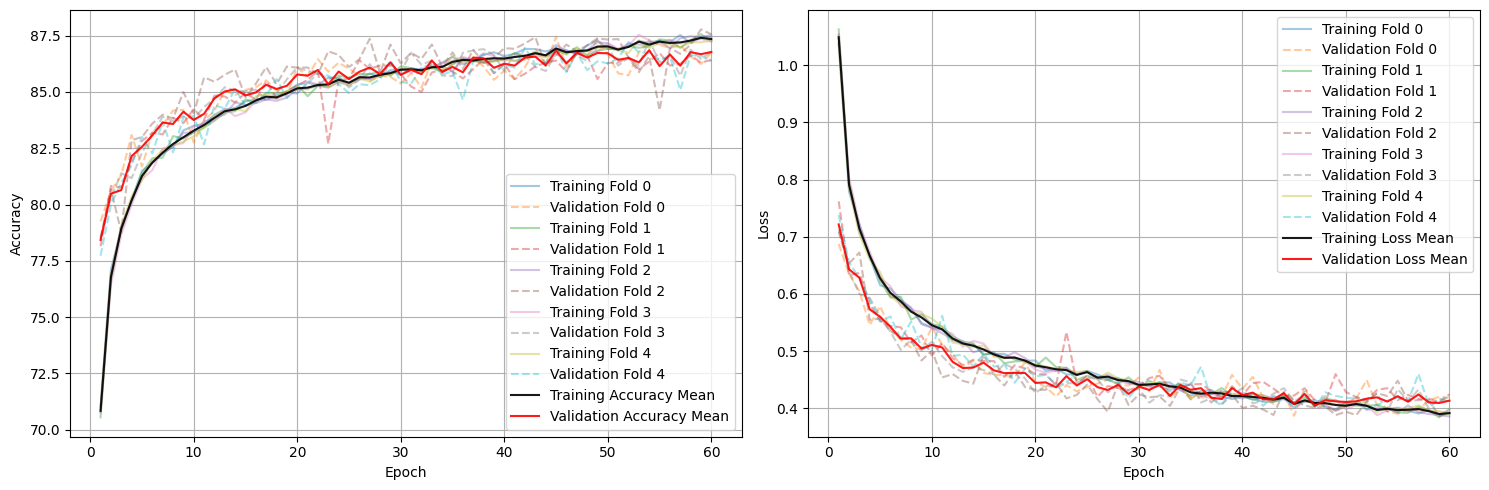

In [4]:
key = 'deeplabv3_mobilenet_v3_large_k_fold_'
model_training_auswertung(key)

# DEEPLABV3+ RESNET101

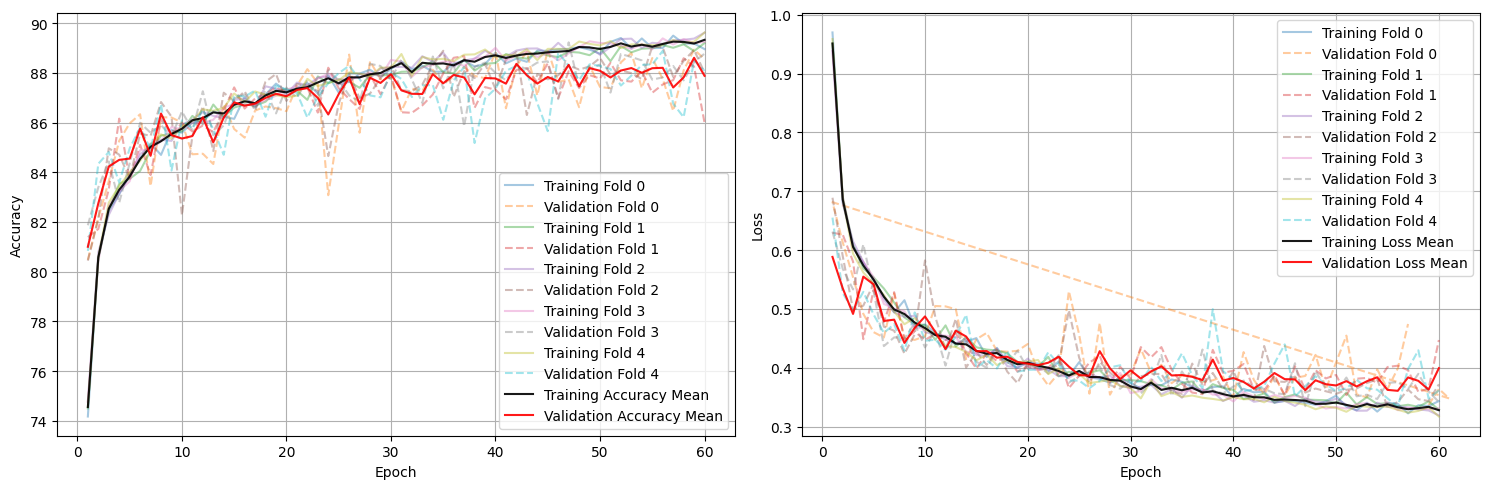

In [5]:
key = 'deeplabv3_resnet101_k_fold_'
values = []
loss_values = []
val_values = []
val_loss_values = []
fix, ax = plt.subplots(1,2, figsize=(15,5))
fold_alpha = 0.4
mean_alpha = 0.9
for i in range(5):
        # Training Accuracy
    Train_Accuracy = (models[f'{key}{i}']['Accuracy_Training Accuracy']['Accuracy'])
    x, y = zip(*Train_Accuracy)
    if i == 0: 
        x = list(x)
        y = list(y)
        x.pop()
        y.pop()
    values.append(y)        
    ax[0].plot(x, y, label=f'Training Fold {i}', alpha=fold_alpha)
    
    # Training Loss
    Train_Loss = (models[f'{key}{i}']['Loss_Training Loss']['Loss'])
    x_loss, y_loss = zip(*Train_Loss)
    if i == 0: 
        x_loss = list(x_loss)
        y_loss = list(y_loss)
        x_loss.pop()
        y_loss.pop()
    loss_values.append(y_loss)
    ax[1].plot(x_loss, y_loss, label=f'Training Fold {i}', alpha=fold_alpha)

    # Validation Accuracy
    Val_Accuracy = (models[f'{key}{i}']['Accuracy_Validation Accuracy']['Accuracy'])
    x_val, y_val = zip(*Val_Accuracy)
    if i == 0: 
        x_val = list(x_val)
        y_val = list(y_val)
        x_val.pop()
        y_val.pop()
    val_values.append(y_val)
    ax[0].plot(x_val, y_val, label=f'Validation Fold {i}', alpha=fold_alpha, linestyle='--')

    # Validation Loss
    Val_Loss = (models[f'{key}{i}']['Loss_Validation Loss']['Loss'])
    x_val_loss, y_val_loss = zip(*Val_Loss)
    if i == 0: 
        x_val_loss = list(x_val_loss)
        y_val_loss = list(y_val_loss)
        x_val_loss.pop()
        y_val_loss.pop()
    val_loss_values.append(y_val_loss)
    ax[1].plot(x_val_loss, y_val_loss, label=f'Validation Fold {i}', alpha=fold_alpha, linestyle='--')
    
mean = np.mean(values, axis=0)
ax[0].plot(x, mean, label='Training Accuracy Mean', color='black', alpha=mean_alpha)
mean_loss = np.mean(loss_values, axis=0)
ax[1].plot(x_loss, mean_loss, label='Training Loss Mean', color='black',  alpha=mean_alpha)
mean_val = np.mean(val_values, axis=0)
ax[0].plot(x_val, mean_val, label='Validation Accuracy Mean', color='red',  alpha=mean_alpha)
mean_val_loss = np.mean(val_loss_values, axis=0)
ax[1].plot(x_val_loss, mean_val_loss, label='Validation Loss Mean', color='red',  alpha=mean_alpha)

# Set labels and legends
for i in range(2):
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel('Epoch')

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')

plt.tight_layout()


# Deeplabv3_mobilenet_v3_large

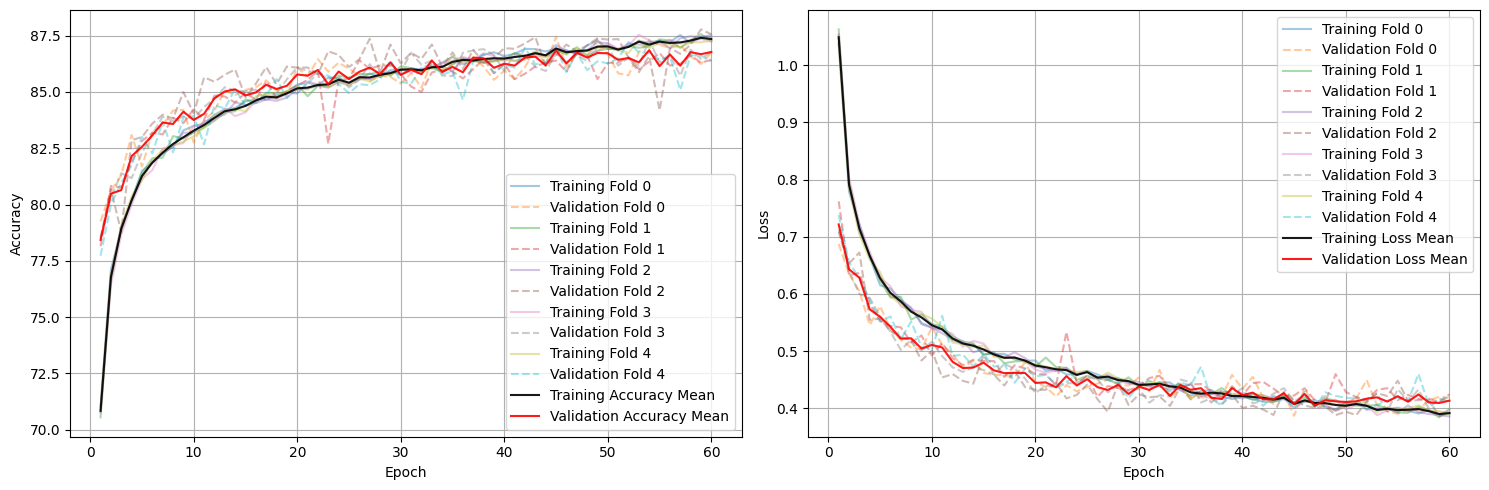

In [6]:
key = 'deeplabv3_mobilenet_v3_large_k_fold_'
model_training_auswertung(key)

# fcn_resnet50

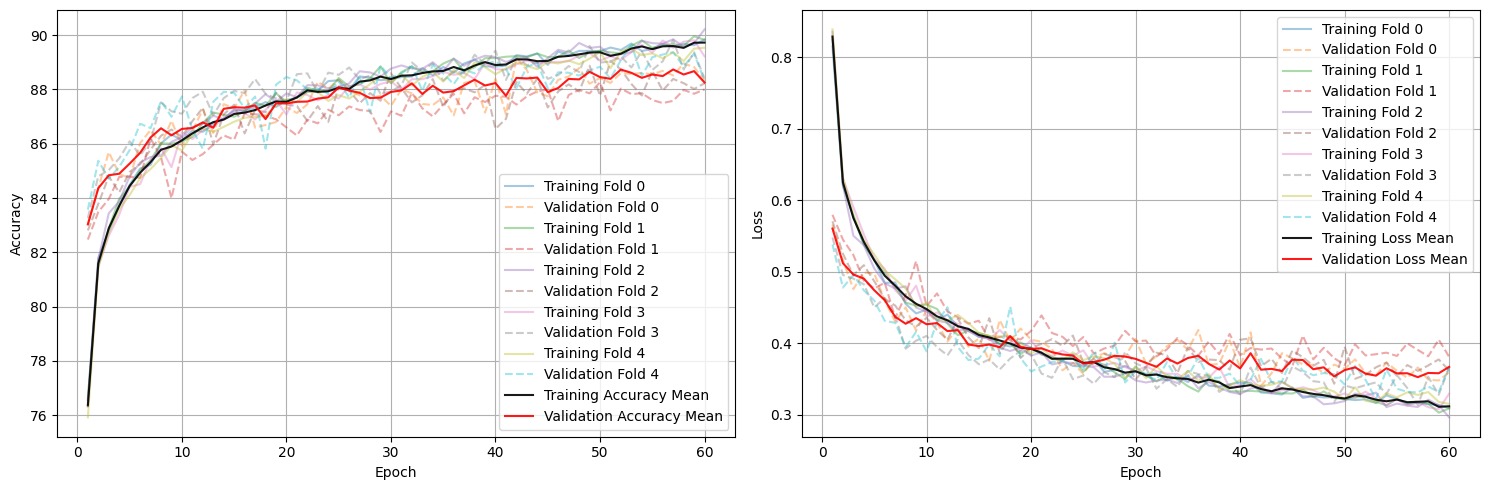

In [7]:
key = 'fcn_resnet50_k_fold_'
model_training_auswertung(key)

# fcn_resnet101

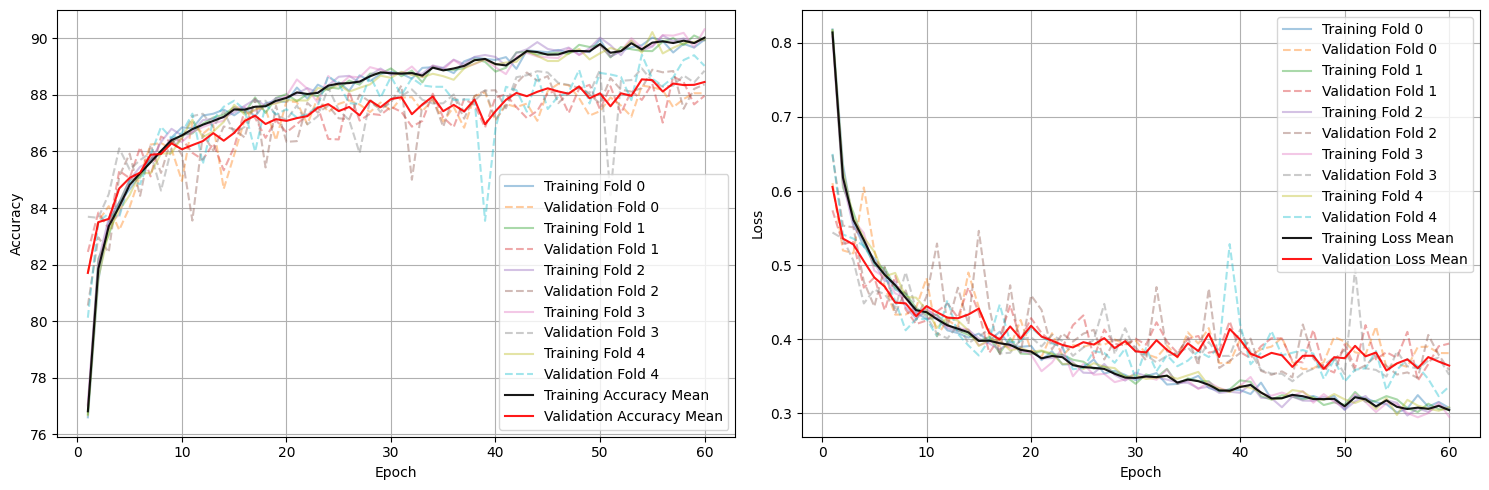

In [8]:
key = 'fcn_resnet101_k_fold_'
model_training_auswertung(key)

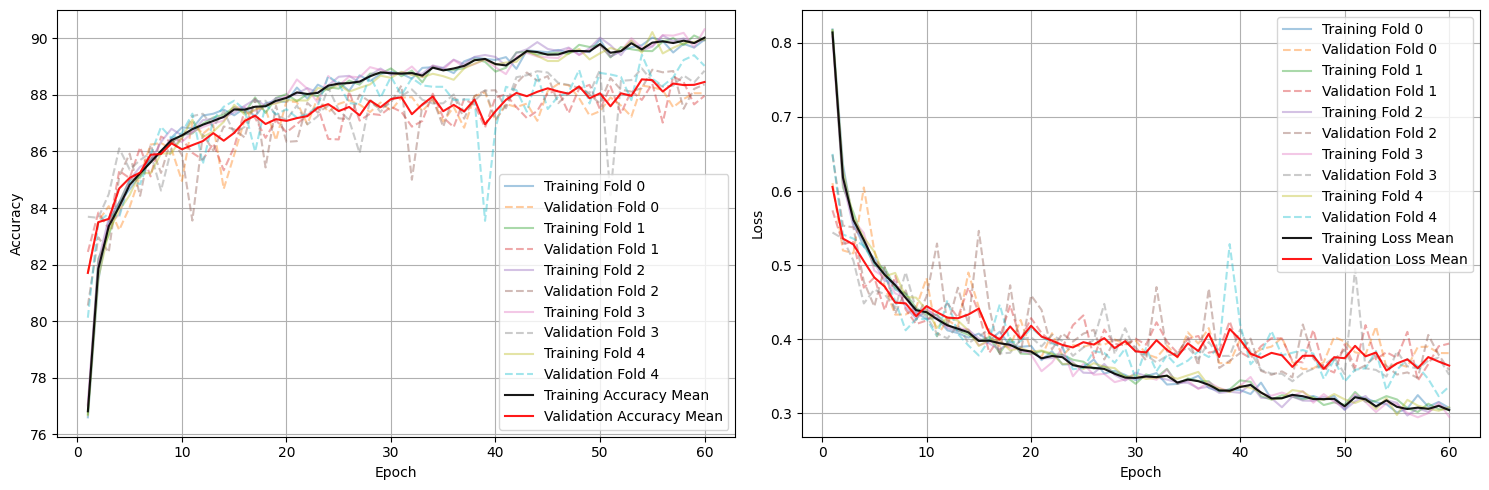

In [ ]:
key = 'fcn_resnet101_k_fold_'
model_training_auswertung(key)

# lraspp_mobilenet_v3_large

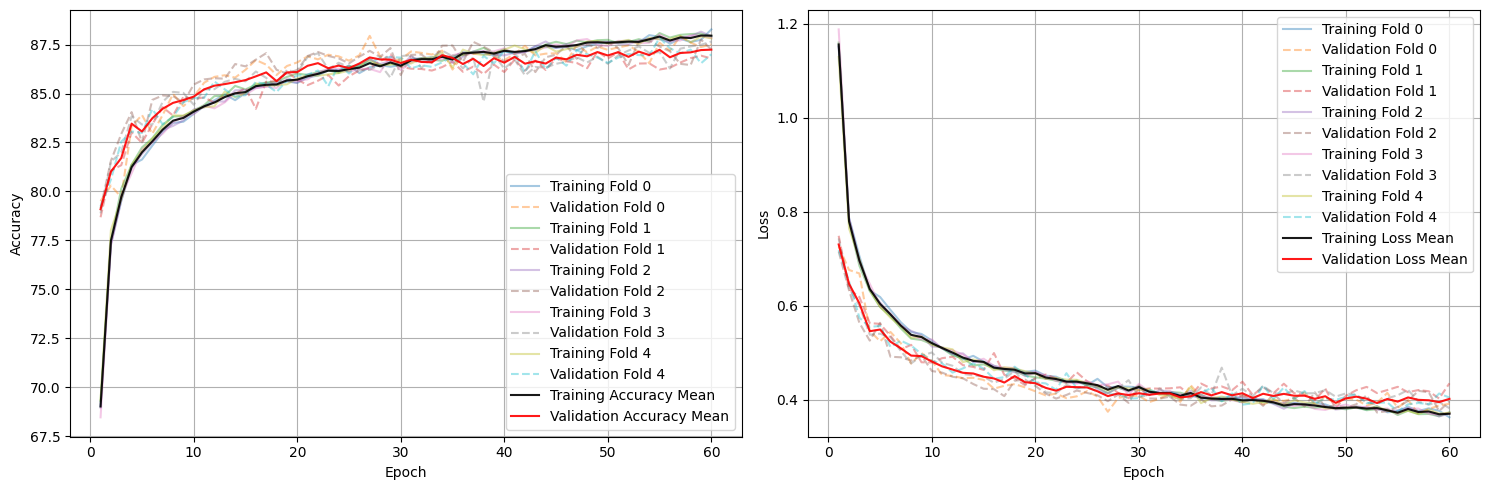

In [9]:
key = 'lraspp_mobilenet_v3_large_k_fold_'
model_training_auswertung(key)